In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Bakery.csv')

In [3]:
df.head(2)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend


In [4]:
df.duplicated().any()

True

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18887 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  18887 non-null  int64 
 1   Items          18887 non-null  object
 2   DateTime       18887 non-null  object
 3   Daypart        18887 non-null  object
 4   DayType        18887 non-null  object
dtypes: int64(1), object(4)
memory usage: 885.3+ KB


In [8]:
df['DateTime1']=pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S')

In [9]:
df.head(2)

,TransactionNo,Items,DateTime,Daypart,DayType,DateTime1
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:05:34


In [10]:
df['date']=df['DateTime1'].dt.date

In [11]:
df['time']=df['DateTime1'].dt.time

In [12]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,DateTime1,date,time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30 09:58:11,2016-10-30,09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30 10:05:34,2016-10-30,10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10-30,10:07:57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10-30,10:07:57
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30 10:07:57,2016-10-30,10:07:57


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18887 entries, 0 to 20506
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  18887 non-null  int64         
 1   Items          18887 non-null  object        
 2   DateTime       18887 non-null  object        
 3   Daypart        18887 non-null  object        
 4   DayType        18887 non-null  object        
 5   DateTime1      18887 non-null  datetime64[ns]
 6   date           18887 non-null  object        
 7   time           18887 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.3+ MB


In [14]:
df.drop(columns=['DateTime'],axis=1,inplace=True)

In [15]:
df.head(2)

,TransactionNo,Items,Daypart,DayType,DateTime1,date,time
0,1,Bread,Morning,Weekend,2016-10-30 09:58:11,2016-10-30,09:58:11
1,2,Scandinavian,Morning,Weekend,2016-10-30 10:05:34,2016-10-30,10:05:34


In [16]:
#here we see coffee is most transaction product
df['Items'].value_counts()

Coffee            4528
Bread             3097
Tea               1350
Cake               983
Pastry             815
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

In [17]:
df.isnull().sum()

TransactionNo    0
Items            0
Daypart          0
DayType          0
DateTime1        0
date             0
time             0
dtype: int64

In [18]:
#how many unique producst are there totat 94 unique product there
df['Items'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [19]:
df['Daypart'].value_counts().reset_index()

,index,Daypart
0,Afternoon,10687
1,Morning,7697
2,Evening,490
3,Night,13


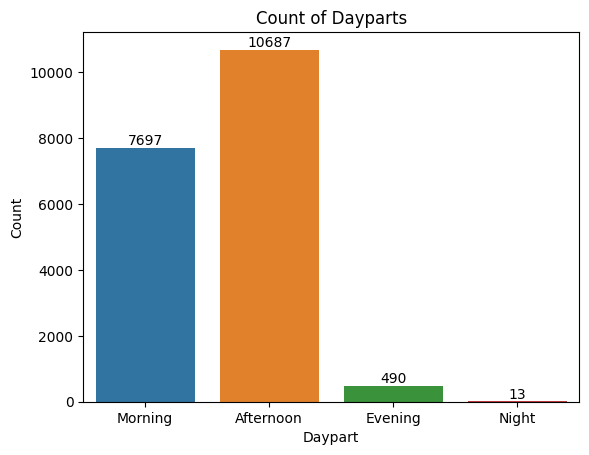

In [20]:
#afternoon daypart having more transaction followed by morning,evening and night time is too low for transaction
ax=sns.countplot(x=df['Daypart'],data=df)
plt.xlabel('Daypart')
plt.ylabel('Count')
plt.title('Count of Dayparts')

for bars in ax.containers:
  ax.bar_label(bars)


In [21]:
#most transaction is done on afternoon period and low transaction is during night period

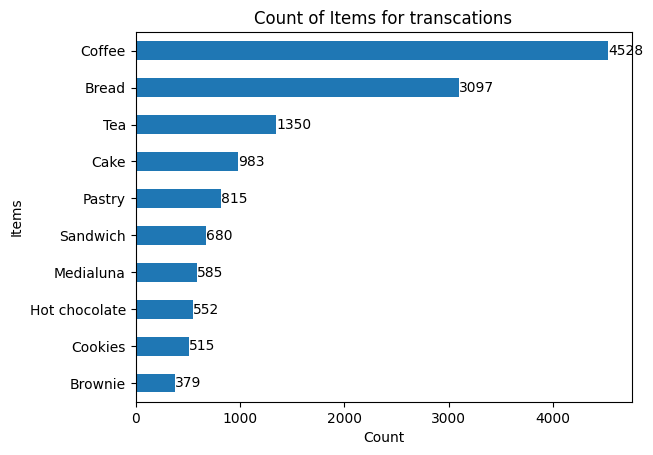

In [22]:
#top 10 product count for transactions
ax=df['Items'].value_counts().sort_values(ascending=False).head(10)[::-1].plot(kind='barh')
plt.ylabel('Items')
plt.xlabel('Count')
plt.title('Count of Items for transcations')


for bars in ax.containers:
  ax.bar_label(bars)

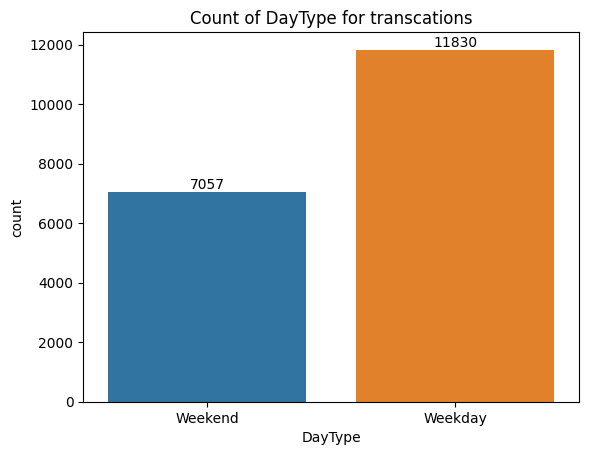

In [23]:
#weekday having more transactions
ax=sns.countplot(x=df['DayType'],data=df)
plt.title('Count of DayType for transcations')


for bars in ax.containers:
  ax.bar_label(bars)

In [24]:
#most of transcation of iems is done during weekdays

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['year']=df['date'].dt.year

In [27]:
df['year'].nunique()

2

In [28]:
df.head()

,TransactionNo,Items,Daypart,DayType,DateTime1,date,time,year
0,1,Bread,Morning,Weekend,2016-10-30 09:58:11,2016-10-30,09:58:11,2016
1,2,Scandinavian,Morning,Weekend,2016-10-30 10:05:34,2016-10-30,10:05:34,2016
3,3,Hot chocolate,Morning,Weekend,2016-10-30 10:07:57,2016-10-30,10:07:57,2016
4,3,Jam,Morning,Weekend,2016-10-30 10:07:57,2016-10-30,10:07:57,2016
5,3,Cookies,Morning,Weekend,2016-10-30 10:07:57,2016-10-30,10:07:57,2016


In [29]:
df['month']=df['date'].dt.month

In [30]:
df.groupby(['year','month'])['TransactionNo'].count()

year  month
2016  1         218
      2         257
      3         360
      4         275
      5         362
      6         290
      7         215
      8         200
      9         208
      10        653
      11       2441
      12       2115
2017  1        2615
      2        2158
      3        2636
      4         678
      5         478
      6         400
      7         470
      8         449
      9         345
      10        326
      11        434
      12        304
Name: TransactionNo, dtype: int64

In [31]:
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]

In [32]:
result2016=df_2016.groupby(['year','month'])['TransactionNo'].count()

In [33]:
result2017=df_2017.groupby(['year','month'])['TransactionNo'].count()

Text(0.5, 1.0, 'Count of transcations by month for 2016')

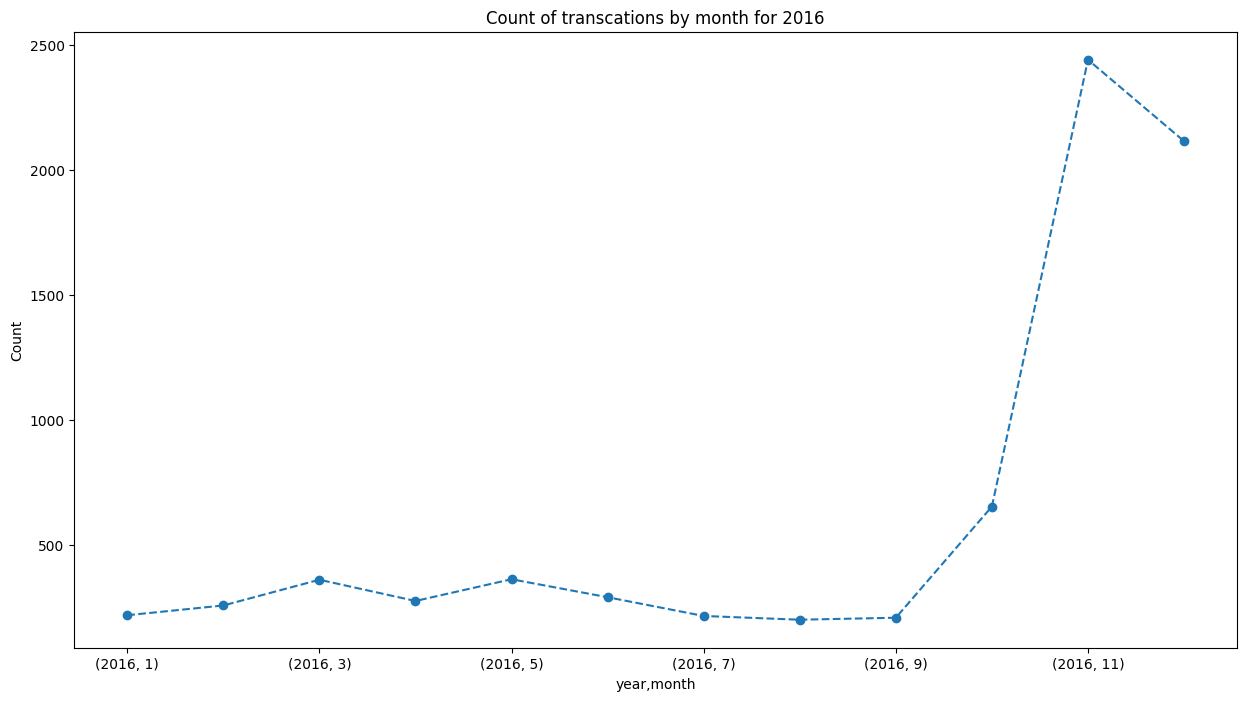

In [34]:
#here we plot line graph

plt.figure(figsize=(15,8))
result2016.plot(kind='line',marker='o',linestyle='--')
plt.ylabel('Count')
plt.title('Count of transcations by month for 2016')


Text(0.5, 1.0, 'Count of transcations by month for 2016')

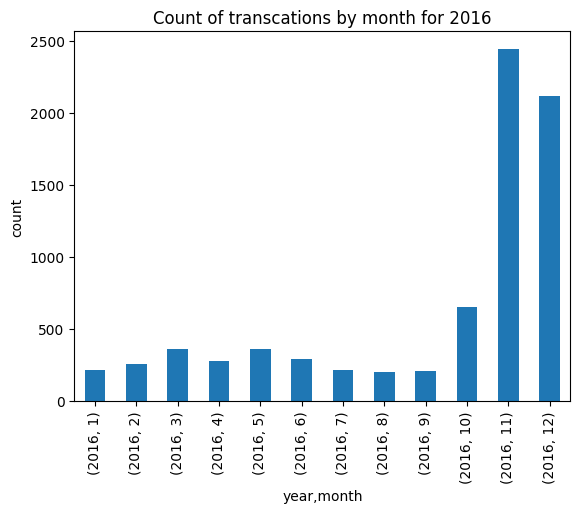

In [35]:
#here we plot bar graph
result2016.plot(kind='bar')
plt.ylabel('count')
plt.title('Count of transcations by month for 2016')

Text(0.5, 1.0, 'Count of transcations by month for 2017')

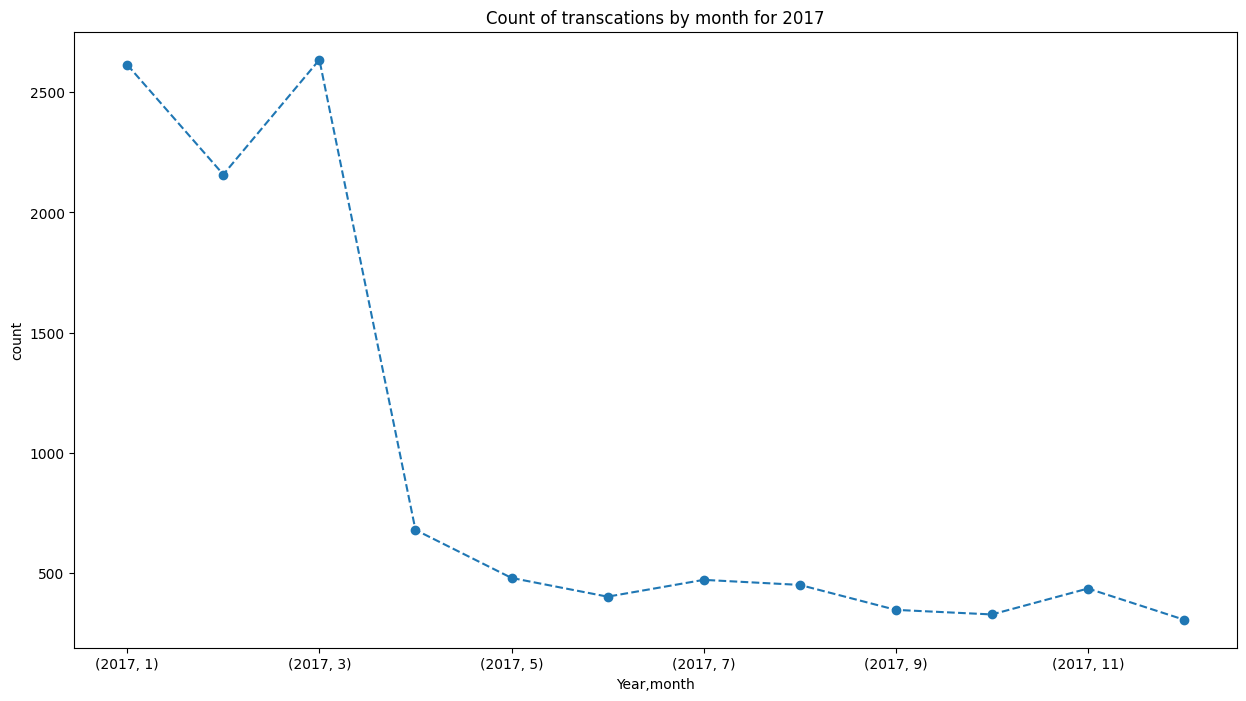

In [36]:
#here we plot line graph
plt.figure(figsize=(15,8))
result2017.plot(kind='line',marker='o',linestyle='--')
plt.ylabel('count')
plt.xlabel('Year,month')
plt.title('Count of transcations by month for 2017')

<Axes: xlabel='year,month'>

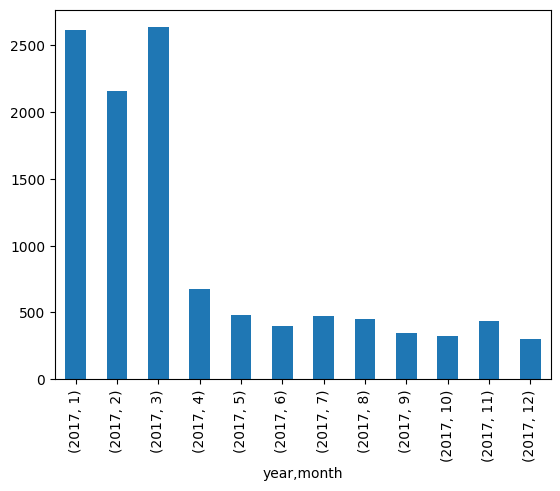

In [37]:
#here we plot bar graph same plot as line chart
result2017.plot(kind='bar')

In [38]:
#here we use plotly line graph for better visualization to count number of transaction by moonth for each year
import plotly.express as px

Year_month_transaction_Count = df.groupby(['year', 'month'])['TransactionNo'].count().reset_index()

fig = px.line(Year_month_transaction_Count, x='month', y='TransactionNo', color='year', markers=True, line_dash='year', title='transaction_Count_by_month_for_2016&2017')
fig.update_xaxes(type='category')
fig.show()

In [39]:
#here we use plotly bar graph for better visualization to count number of transaction by moonth for each year above and these graph is same as below just dufference is line and bar chart
import plotly.express as px

Year_month_transaction_Count = df.groupby(['year', 'month'])['TransactionNo'].count().reset_index()

fig = px.bar(Year_month_transaction_Count, x='month', y='TransactionNo', color='year', title='transaction_Count_for_month_by_Year')
fig.update_xaxes(type='category')
fig.show()

